# Previsão do valor de imóveis em SP

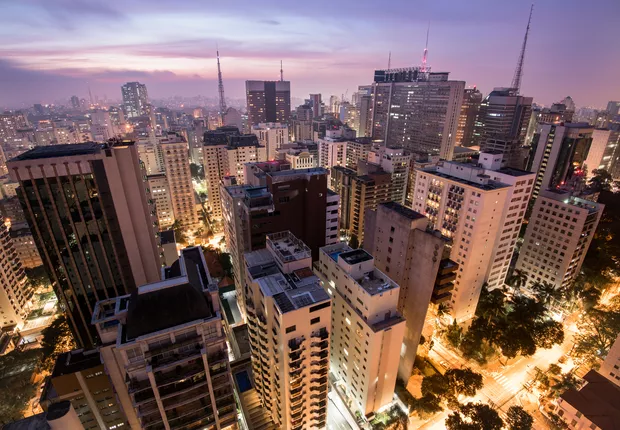

# 1) Introdução

Do dia 23 ao dia 27 de maio, aconteceu a quarta edição da Imersão Alura de Dados. Um evento voltado à data science, com aulas sobre manipulação e processamentos de dados, além do uso de modelos de regressão para fazer análises estatísticas. 
Duas bases de dados foram utilizadas nessa semana, uma referente aos dados de imóveis de São Paulo (com variáveis como bairro, quantidade de quartos, quantidade de banheiros, quantidade de vagas, metragem do imóvel, valor do imóvel) e outra base de dados do IBGE, com informações mais voltadas à renda familiar e quantidade de pessoas por residência da cidade de São Paulo.
Ambas as bases de dados foram fornecidas pela Alura.
O objetivo final dessa análise é criar uma forma de predizer o valor de venda dos imóveis de São Paulo.

# 2) Análise Exploratória

Análise exploratória de dados nada mais é do que a utilização de técnicas de visualização de dados ou estatísticas para descobrir informações de uma ou mais bases de dados.
Primeiro, importarei os dados usados utilizado a biblioteca pandas.

In [189]:
import pandas as pd
df = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
print("Dados lidos!")

Dados lidos!


Média da metragem para cada um dos bairros:

In [190]:
df.groupby("Bairro")[["Metragem"]].mean()

Metragem
Bairro                       
Aclimação          253.056818
Alto da Boa Vista  418.875000
Alto da Lapa       294.337209
Alto da Mooca      270.050000
Alto de Pinheiros  433.444988
...                       ...
Vila Água Funda    152.200000
Água Branca        191.000000
Água Fria          165.416667
Água Funda         139.000000
Água Rasa          340.250000

[701 rows x 1 columns]

Mediana da metragem, ou seja, o exato valor do meio, para cada um dos bairros.

In [191]:
df.groupby("Bairro")[["Metragem"]].median()

Metragem
Bairro                     
Aclimação             227.5
Alto da Boa Vista     378.0
Alto da Lapa          255.0
Alto da Mooca         182.5
Alto de Pinheiros     412.0
...                     ...
Vila Água Funda       143.0
Água Branca           174.0
Água Fria             174.5
Água Funda            139.0
Água Rasa             180.0

[701 rows x 1 columns]

Aqui, vou importar algumas bibliotecas gráficas, como o matplotlib e o seaborn, para fazer visualizações de dados e tentar retirar alguns insights.

In [192]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Acho que uma informação interessante podia vir a partir do agrupamento dos bairros tendo a média do valor da residência como indicador, mas é necessário transformar a coluna Valor antes para uma forma numérica. 

In [193]:
df["Valor"].str.split(expand = True)

0          1     2
0      R$  7.000.000  None
1      R$  3.700.000  None
2      R$    380.000  None
3      R$    685.000  None
4      R$    540.000  None
...    ..        ...   ...
10003  R$    665.000  None
10004  R$  2.300.000  None
10005  R$  1.050.000  None
10006  R$      2.200  /Mês
10007  R$    270.000  None

[10008 rows x 3 columns]

In [194]:
df["Tipo de Anúncio"] = df["Valor"].str.split(expand = True)[2]
df["Valor"] = df["Valor"].str.split(expand = True)[1]

In [195]:
df["Valor"]

0        7.000.000
1        3.700.000
2          380.000
3          685.000
4          540.000
           ...    
10003      665.000
10004    2.300.000
10005    1.050.000
10006        2.200
10007      270.000
Name: Valor, Length: 10008, dtype: object

In [196]:
df["Valor"] = df["Valor"].str.replace('.', '')
df["Valor"] = df["Valor"].astype(float)

Existem alguns anúncios que não são de vendas, e sim de alugueis. Vou retirar os dados em que os dados são de alugueis, visto que o objetivo da análise é saber o valor de venda dos imóveis.

In [197]:
df["Tipo de Anúncio"].value_counts()

/Mês    848
/Ano      2
/Dia      2
Name: Tipo de Anúncio, dtype: int64

In [198]:
df_vendas = df[df["Tipo de Anúncio"].isnull()]
df_vendas

Rua              Bairro     Cidade  \
0               Avenida Itacira, 255    Planalto Paulista  São Paulo   
1      Rua Aurelia Perez Alvarez, 42   Jardim dos Estados  São Paulo   
2                     Rua Alba Valdez     Jardim Reimberg  São Paulo   
3                                 NaN      Jardim Morumbi  São Paulo   
4            Rua Tobias Barreto, 195                Mooca  São Paulo   
...                               ...                 ...        ...   
10002                   Avenida Odila   Planalto Paulista  São Paulo   
10003                      Rua Tapuçu          Vila Sofia  São Paulo   
10004                   Rua Guararema     Bosque da Saúde  São Paulo   
10005               Rua Estero Belaco       Vila da Saúde  São Paulo   
10007      Rua Barão de Tramandaí, 0          Vila Alpina  São Paulo   

       Metragem  Quartos  Banheiros  Vagas      Valor Tipo de Anúncio  
0          1000        4          8      6  7000000.0            None  
1           496        4          4      4  3700000.0            None  
2           125        4          3      2   380000.0            None  
3           310        3          2      4   685000.0            None  
4           100        3          2      2   540000.0            None  
...         ...      ...        ...    ...        ...             ...  
10002       267        3          6      4  1500000.0            None  
10003        95        2          2      2   665000.0            None  
10004       605        8          7      5  2300000.0            None  
10005       205        3          3      6  1050000.0            None  
10007       122        3          2      2   270000.0            None  

[9156 rows x 9 columns]

Usei a função groupby para agrupar pelo bairro tendo a média do valor do imóvel como indicador.

In [199]:
df_vendas.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6)
top_6 = df_vendas.groupby("Bairro")[["Valor"]].mean().sort_values(by = "Valor",ascending = False).head(6)

O bairro que tem a maior média por valor do imóvel é o Jardim América.
No eixo Y, fiz uma transformação para o valor aparecer com a letra M, representando milhões, método que vou continuar usando nos próximos gráficos, para facilitar o entendimento. Mil é representado pela letra K. 
Utilizei uma função do site "https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi" 


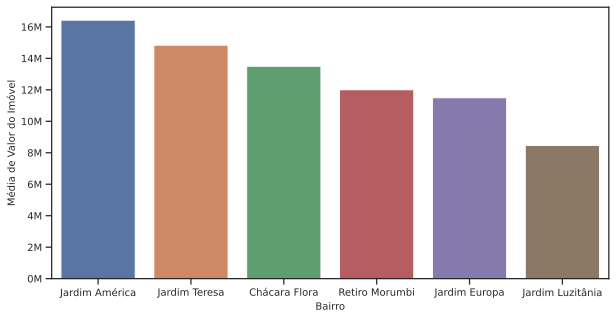

In [242]:
g = sns.barplot( x = top_6.index, y = top_6["Valor"])
plt.rcParams["figure.figsize"] = (10, 5)
plt.ylabel("Média de Valor do Imóvel",fontsize=10)
plt.xlabel("Bairro",fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(axis="y", style='plain')

listaxticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]

ylabels = [format(x) + 'M' for x in newList]



g.set_yticklabels(ylabels)

plt.rcParams["figure.figsize"] = (10, 5)

plt.show()

Para tirar outliers nas variáveis independentes e fazer análises gráficas mais eficientes, vou filtrar os dados. Usei a estatística Z Score, que define um nível de distância da média dos dados e retirei do dataframe os dados que estão extremamente distantes da média de cada coluna.

In [201]:
from scipy import stats
import numpy as np

df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Metragem"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Valor"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Banheiros"])) < 3)]
df_vendas = df_vendas[(np.abs(stats.zscore(df_vendas["Quartos"])) < 3)]

Como era esperado, parece haver uma correlação positiva entre o tamanho da residência e o valor, com a linha vermelha representando a reta de regressão dos dados (que vou explicar melhor quando estiver falando de Machine Learning).

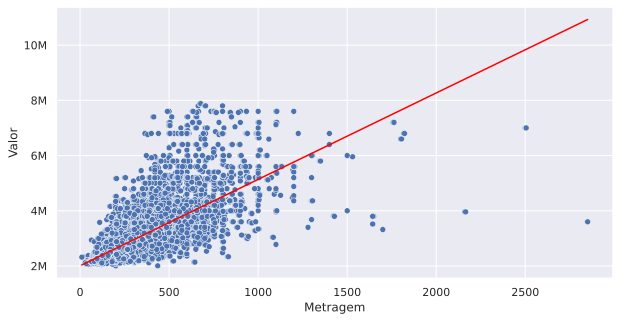

In [202]:
scatter = sns.scatterplot(x = df_vendas["Metragem"], y = df_vendas["Valor"])
plt.ticklabel_format(axis="y", style='plain')
m, b = np.polyfit(df_vendas["Metragem"], df_vendas["Valor"], 1)
plt.plot(df_vendas["Metragem"], m*df_vendas["Metragem"]+b, color = "red")



listayticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]
ylabels = [format(x) + 'M' for x in newList]
scatter.set_yticklabels(ylabels)


plt.show()

Pode-se fazer um gráfico de dispersão com outras variáveis, além da metragem, como, por exemplo, a quantidade de banheiros. Onde também se parece ter uma relação positiva entre as variáveis.

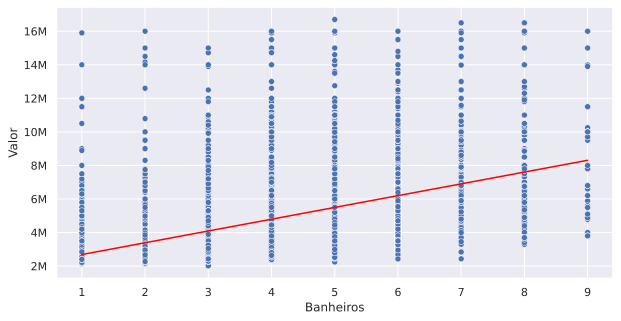

In [203]:
scatter = sns.scatterplot(x = df_vendas["Banheiros"], y = df_vendas["Valor"])

plt.ticklabel_format(axis="y", style='plain')
listayticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]
ylabels = [format(x) + 'M' for x in newList]
scatter.set_yticklabels(ylabels)

m, b = np.polyfit(df_vendas["Banheiros"], df_vendas["Valor"], 1)
plt.plot(df_vendas["Banheiros"], m*df_vendas["Banheiros"]+b, color = "red")

plt.show()

Agora, um histograma do valor do imóvel, que mostra como ele está distribuído na amostra, ou seja, a frequência que seus valores aparecem.

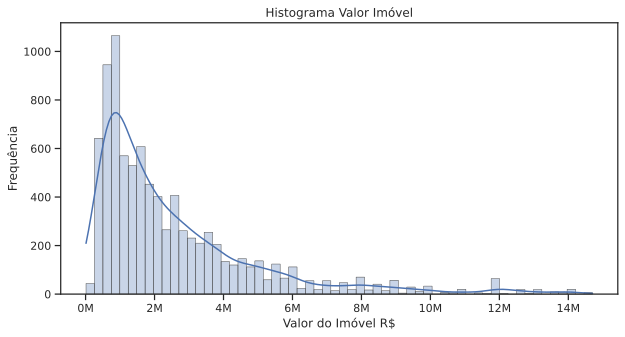

In [204]:
sns.set_theme(style="ticks")
g = sns.histplot(df_vendas["Valor"],alpha = 0.30, kde = True,  multiple="stack", palette="light:m_r", edgecolor=".3",linewidth=.5)

plt.ticklabel_format(axis="x", style='plain')
listaxticks = list(plt.xticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]
xlabels = [format(x) + 'M' for x in newList]
g.set_xticklabels(xlabels)

plt.ylabel("Frequência", fontsize = 12)
plt.xlabel("Valor do Imóvel R$", fontsize = 12)
plt.rcParams["figure.figsize"] = (10, 5)
plt.title("Histograma Valor Imóvel")


plt.show()

Outra análise interessante seria preço do metro quadrado por bairro e a plotagem de um gráfico para verificação dessa informação.

Primeiro, fiz uma coluna para guardar a informação do preço do metro quadrado. Agrupei pelo groupby e depois fiz o cálculo pertinente.

In [205]:
df_vendas_group = df_vendas.groupby("Bairro").sum()
df_vendas_group["Preço por M2"] = df_vendas_group["Valor"]/df_vendas_group["Metragem"]
df_vendas_group.reset_index(inplace=True)

In [206]:
top30_bairros = df_vendas_group.sort_values(ascending = False, by = "Preço por M2").head(30)

Pode-se notar que, de longe, o bairro com maior preço por metro quadrado é o Vila Guaca, acompanhado de Jardim América.

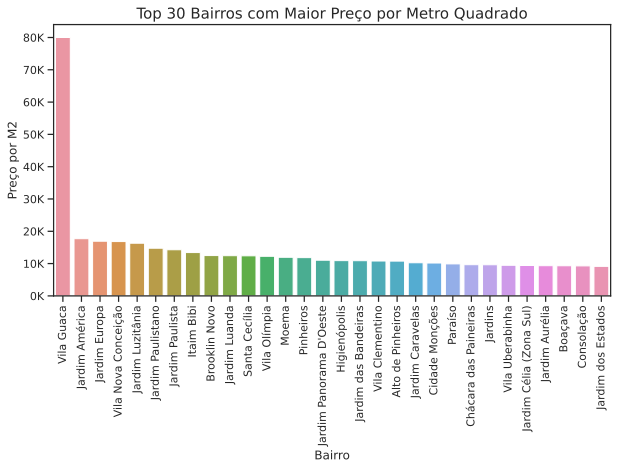

In [207]:

barchart = sns.barplot(x = top30_bairros["Bairro"], y = top30_bairros["Preço por M2"])

listaxticks = list(plt.yticks()[0])
newList = [x / 1000 for x in listaxticks]
newList = [int(x) for x in newList]

ylabels = [format(x) + 'K' for x in newList]

plt.xticks(rotation = 90)

barchart.set_yticklabels(ylabels)
plt.title("Top 30 Bairros com Maior Preço por Metro Quadrado", fontsize = 15)

plt.show()


Resolvi utilizar também a galeria Galeritas, uma biblioteca gráfica feita pela equipe de Data Science da Creditas. Primeiro, peguei uma lista com os 3 bairros que mais tinham dados no dataframe original. Assim, pode-se plotar um gráfico mais confiável, por estar apoiado em mais dados.

In [208]:
top4 = df_vendas["Bairro"].value_counts()[:3].index

Resolvi usar a galeria Galeritas com a função ECDF. 
Basicamente, esse tipo de gráfico pode ser interpretado da seguinte forma: o valor no eixo Y é a porcentagem dos dados que atendem às informações no eixo X. Por exemplo, no eixo Y, na curva do Alto do Pinheiros, no ponto 0.8, há um valor correspondente na curva em torno de 6 milhões no eixo X. Ou seja, 80% dos dados do dataframe desse bairro tem um valor de até 6 milhões.

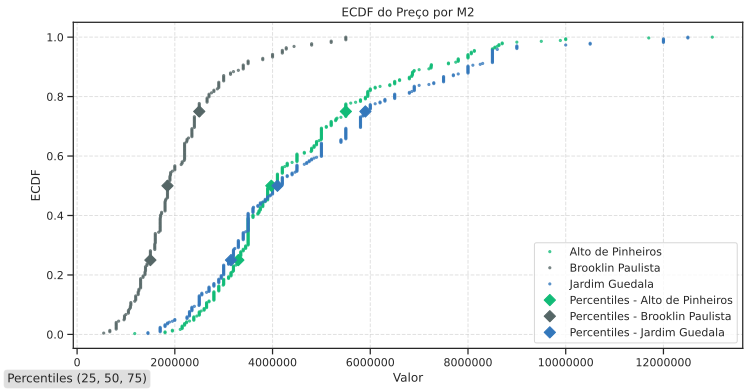

In [209]:
from galeritas import plot_ecdf_curve

ecdf_curv = plot_ecdf_curve( df_vendas.query("Bairro in @top4"), column_to_plot='Valor', figsize=(12, 6), plot_title='ECDF do Preço por M2', hue = "Bairro" )

plt.ticklabel_format(axis="x", style='plain')



A visualização mais adequada para conseguir informações de mediana, quartis e outliers é o que se chama de Boxplot. Na imagem abaixo, há um exemplo de Boxplot e como identificar cada um dos dados no gráfico.

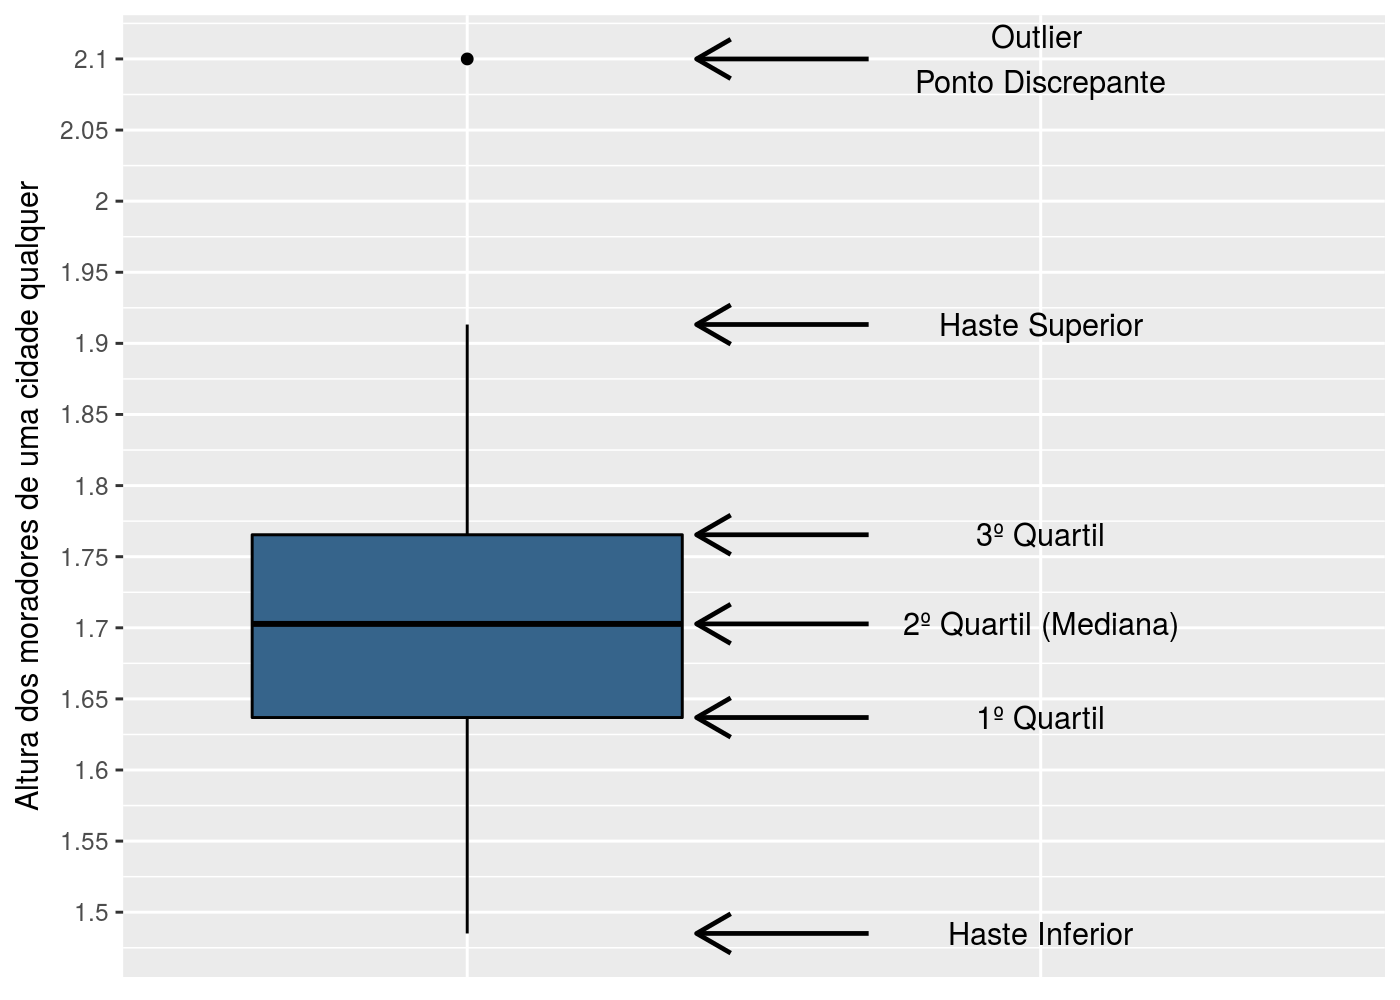

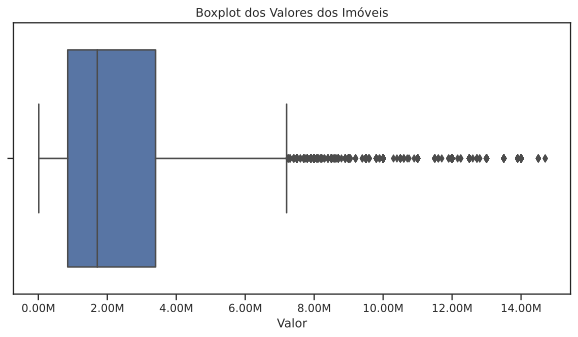

In [210]:
boxchart = sns.boxplot(x = df_vendas["Valor"], orient="h")
plt.ticklabel_format(axis="x", style='plain')

xlabels = ['{:,.2f}'.format(x) + 'M' for x in boxchart.get_xticks()/1000000]
boxchart.set_xticklabels(xlabels)
plt.title("Boxplot dos Valores dos Imóveis")
plt.show()

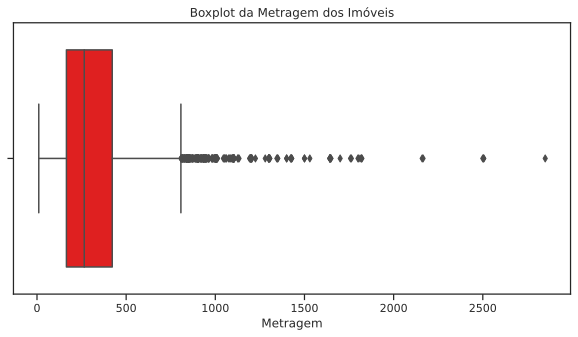

In [211]:
boxchart = sns.boxplot(x = df_vendas["Metragem"], color = "red")
plt.ticklabel_format(axis="x", style='plain')
plt.title("Boxplot da Metragem dos Imóveis")
plt.show()

# Vinculação dos dados do IBGE com o dataset de Imóveis

Além do dataset dos imóveis, a Alura proveu um outro dataset do ibge. O qual possui dados censitários da cidade de São Paulo, como renda das residências e número de moradores.

In [212]:
df_ibge = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv",sep = ";" )

In [213]:
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

Dentre todas as variáveis, segundo o dicionário ("https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view"), acredito que seja melhor tratar a coluna "Nome_do_distrito", para que eu possa juntar esse Dataset com o Dataset dos imóveis e assim poder fazer outras análises.

In [214]:
df_ibge[["Nome_do_distrito"]]

Nome_do_distrito
0            �GUA RASA
1            �GUA RASA
2            �GUA RASA
3            �GUA RASA
4            �GUA RASA
...                ...
18358          LAJEADO
18359          LAJEADO
18360          LAJEADO
18361          LAJEADO
18362          LAJEADO

[18363 rows x 1 columns]

In [215]:
df_ibge = df_ibge.replace({'Nome_do_distrito' : 
                     {'BEL�M' : 'BELÉM',
                      'BRASIL�NDIA' :	'BRASILÂNDIA',
                      'BR�S' : 'BRÁS',
                      'BUTANT�' :	'BUTANTÃ',
                      'CAP�O REDONDO' : 'CAPÃO REDONDO',
                      'CARR�O' : 'CARRÃO',
                      'CONSOLA��O' :	'CONSOLAÇÃO',
                      'FREGUESIA DO �' : 'FREGUESIA DO Ó',
                      'GRAJA�' : 'GRAJAÚ',
                      'JAGUAR�' : 'JAGUARÉ',
                      'JARAGU�' : 'JARAGUÁ',
                      'JARDIM S�O LU�S' : 'JARDIM SÃO LUÍS',
                      'JARDIM �NGELA' : 'JARDIM ÂNGELA',
                      'JA�AN�' : 'JAÇANÃ',
                      'JOS� BONIF�CIO' : 'JOSÉ BONIFÁCIO',
                      'LIM�O' : 'LIMÃO',
                      'REP�BLICA' : 'REPÚBLICA',
                      'SACOM�' : 'SACOMÃ',
                      'SANTA CEC�LIA' : 'SANTA CECÍLIA',
                      'SA�DE' : 'SAÚDE',
                      'S�' : 'SÉ',
                      'S�O DOMINGOS' : 'VILA SÃO DOMINGOS',
                      'S�O LUCAS' : 'SÃO LUCAS',
                      'S�O MATEUS' : 'SÃO MATEUS',
                      'S�O MIGUEL' : 'SÃO MIGUEL',
                      'S�O RAFAEL' : 'SÃO RAFAEL',
                      'TATUAP�' : 'TATUAPÉ',
                      'TREMEMB�' : 'TREMEMBÉ',
                      'VILA CURU��' : 'VILA CURUÇÁ',
                      'VILA JACU�' : 'VILA JACUÍ',
                      'VILA S�NIA' : 'VILA SÔNIA',
                      '�GUA RASA' : 'ÁGUA RASA'}})

In [216]:
df_ibge["Nome_do_distrito"] = df_ibge["Nome_do_distrito"].str.title()
df_vendas["Bairro"] = df_vendas["Bairro"].str.title()

In [217]:
df_ibge = df_ibge.rename(columns={"Nome_do_distrito": "Bairro"})

Agora que a coluna já está tratada, pode-se realizar o merge de ambos os dados.
Decidi colocar a variável V003 (Média do número de moradores em domicílios
particulares permanentes), V005 (Valor do rendimento nominal médio mensal das
pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)) e a V009 (Valor do rendimento nominal médio mensal das
pessoas de 10 anos ou mais de idade (com e sem rendimento)) pois acredito que possam dar informações importantes.


In [218]:
df_ibge = df_ibge[["Bairro","V003","V005","V009"]]

Vou substituir as variáveis V003, V005 e V009 por nomes mais adequados e deixá-las em formatos numéricos.

In [219]:
df_ibge.rename(columns={"V003": "Média do número de moradores","V005":"Renda média mensal","V009":"Renda média mensal +10Anos"}, inplace = True)

In [220]:
df_ibge["Média do número de moradores"] = df_ibge["Média do número de moradores"].str.replace(",",".").astype(float)
df_ibge["Renda média mensal"] = df_ibge["Renda média mensal"].str.replace(",",".").astype(float)
df_ibge["Renda média mensal +10Anos"] = df_ibge["Renda média mensal +10Anos"].str.replace(",",".").astype(float)

Agora, decidi agrupar por bairro para conseguir o valor da renda média de cada bairro e a média do número de moradores por residência.

In [221]:
df_ibge = df_ibge.groupby("Bairro").mean().reset_index()

Substituí os nomes das colunas para informar melhor, visto que agora o que se tem são médias com base no bairro.

In [222]:
df_ibge.rename(columns={"Média do número de moradores": "Média Moradores do Bairro","Renda média mensal":"Renda Média do Bairro","Renda média mensal +10Anos":"Renda média +10Anos do Bairro"}, inplace = True)

Finalmente, posso realizar o merge.

In [223]:
df_vendas_ibge = df_vendas.merge(df_ibge, on='Bairro')

O dataframe original, df_vendas, tinha 8883 linhas. No entanto, como os dados do IBGE não contemplam todos os bairros, essa quantidade foi diminuída para 2081. Ainda assim, pode-se fazer algumas análises gráficas antes de partir para aplicação de modelos de machine learning.

In [224]:
df_vendas_ibge

Rua             Bairro     Cidade  Metragem  \
0     Rua Tobias Barreto, 195               Mooca  São Paulo       100   
1                    Rua Timbó              Mooca  São Paulo       170   
2                          NaN              Mooca  São Paulo        80   
3            Rua Manuel Galvão              Mooca  São Paulo       106   
4              Rua Timbó, 130               Mooca  São Paulo       170   
...                        ...                ...        ...       ...   
2076       Rua Carlos Gonzalez        Vila Curuçá  São Paulo       121   
2077      Rua da Cipaúba, 178   Vila São Domingos  São Paulo       140   
2078      Rua da Cipaúba, 178   Vila São Domingos  São Paulo       145   
2079                       NaN         Aricanduva  São Paulo       278   
2080         Rua Veloso Guerra         Bela Vista  São Paulo       190   

      Quartos  Banheiros  Vagas      Valor Tipo de Anúncio  \
0           3          2      2   540000.0            None   
1           3          2      2   940000.0            None   
2           2          2      4   870000.0            None   
3           3          3      2   450000.0            None   
4           3          1      2  1000000.0            None   
...       ...        ...    ...        ...             ...   
2076        2          1      2   264214.0            None   
2077        3          3      2   480000.0            None   
2078        3          3      2   480000.0            None   
2079        3          3      2   480000.0            None   
2080        3          2      1   960000.0            None   

      Média Moradores do Bairro  Renda Média do Bairro  \
0                      2.822424            3293.498636   
1                      2.822424            3293.498636   
2                      2.822424            3293.498636   
3                      2.822424            3293.498636   
4                      2.822424            3293.498636   
...                         ...                    ...   
2076                   3.446557             892.320613   
2077                   3.215041            1592.756179   
2078                   3.215041            1592.756179   
2079                   3.245161            1312.305645   
2080                   2.244468            3802.591135   

      Renda média +10Anos do Bairro  
0                       2183.212197  
1                       2183.212197  
2                       2183.212197  
3                       2183.212197  
4                       2183.212197  
...                             ...  
2076                     583.245869  
2077                    1065.330732  
2078                    1065.330732  
2079                     883.293952  
2080                    2777.620141  

[2081 rows x 12 columns]

Aparentemente, há uma relação positiva entre o valor da renda média do bairro e o valor dos imóveis. 

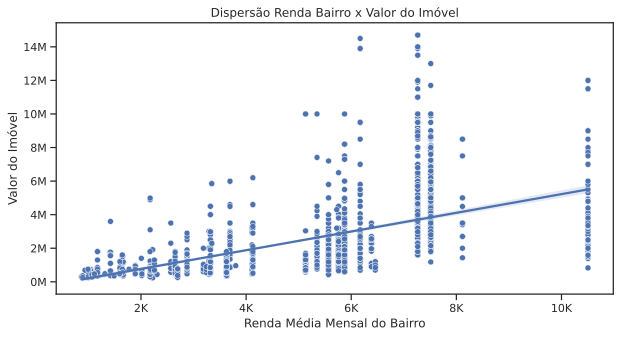

In [225]:
scatter = sns.scatterplot(x = df_vendas_ibge["Renda Média do Bairro"], y = df_vendas_ibge["Valor"])

sns.regplot( x = df_vendas_ibge["Renda Média do Bairro"], y = df_vendas_ibge["Valor"], scatter=False, ax=scatter)

plt.ticklabel_format(axis="y", style='plain')
listaxticks = list(plt.yticks()[0])
newList = [x / 1000000 for x in listaxticks]
newList = [int(x) for x in newList]

ylabels = [format(x) + 'M' for x in newList]
scatter.set_yticklabels(ylabels)

plt.ticklabel_format(axis="x", style='plain')
listaxticks = list(plt.xticks()[0])
newList = [x / 1000 for x in listaxticks]
newList = [int(x) for x in newList]

xlabels = [format(x) + 'K' for x in newList]
scatter.set_xticklabels(xlabels)

plt.ylabel("Valor do Imóvel", fontsize = 12)
plt.xlabel("Renda Média Mensal do Bairro", fontsize = 12)
plt.title("Dispersão Renda Bairro x Valor do Imóvel")

plt.show()

Também há uma correlação positiva entre a renda média mensal das pessoas com + de 10 anos do bairro e o valor do imóvel.

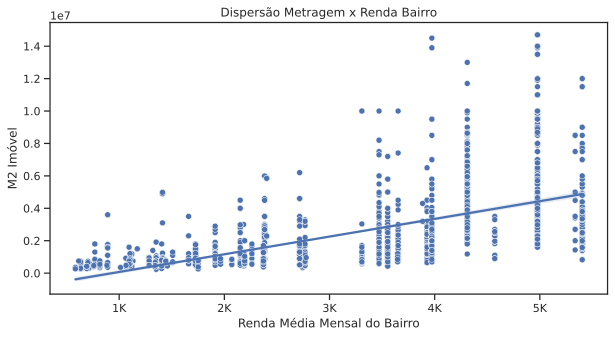

In [226]:
scatter = sns.scatterplot(x = df_vendas_ibge["Renda média +10Anos do Bairro"], y = df_vendas_ibge["Valor"])

sns.regplot( x = df_vendas_ibge["Renda média +10Anos do Bairro"], y = df_vendas_ibge["Valor"], scatter=False, ax=scatter)



plt.ticklabel_format(axis="x", style='plain')
listaxticks = list(plt.xticks()[0])
newList = [x / 1000 for x in listaxticks]
newList = [int(x) for x in newList]

xlabels = [format(x) + 'K' for x in newList]
scatter.set_xticklabels(xlabels)

plt.ylabel("M2 Imóvel", fontsize = 12)
plt.xlabel("Renda Média Mensal do Bairro", fontsize = 12)
plt.title("Dispersão Metragem x Renda Bairro")


plt.show()

Plotando uma matriz de correlação, tem-se o nível de correlação de uma variável dada outra. Dá pra notar que as relações que fiz anteriormente, entre as rendas médias e o valor do imóvel, são algumas das que possuem maior correlação nos dados dadas as correlações entre os dois dataframes.
No entanto, há uma correlação muito alta entre duas variáveis explicativas, de 0.96, entre o valor da renda média e o valor da renda média +10 anos. Isso pode gerar um problema de multicolinearidade, o que não prejudica a performance do modelo geral, mas pode prejudicar a significância das estatísticas t, que vou explicar posteriormente.

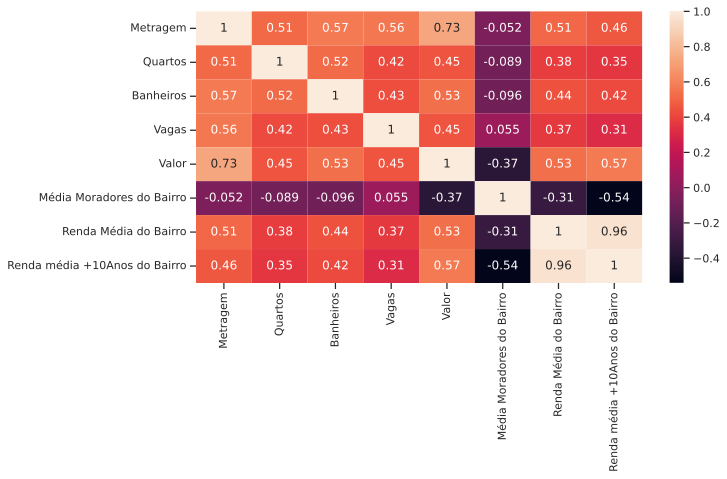

In [227]:
sns.heatmap(df_vendas_ibge.drop(["Rua","Bairro","Cidade","Tipo de Anúncio"],axis = 1).corr(), annot=True)
plt.show()

# 3) Machine Learning


Machine Learning é o uso de algoritmos computacionais para se descobrir padrões em dados e, a partir daí, tirar informações e resultados. Essas técnicas não são novas, a Econometria, ramo da economia que utiliza estatística para verificar relações lineares ou não entre variáveis, já possui algumas décadas, no entanto, o machine learning potencializa esses instrumentos estatísticos por facilitá-los de forma computacional.
Aqui, utilizei a biblioteca scikit learn, que possui vários algoritmos de machine learning e de fácil uso.

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from regressors import stats

Resolvi utilizar a regressão linear, que, basicamente, é uma forma de traçar uma reta, em um gráfico de dispersão de duas variáveis, que possui, dentre todas as possiveis retas, a menor distância das variáveis.
Assim, esse modelo consegue dizer qual a relação linear entre as duas ou mais variáveis.
Aqui, como o objetivo da análise é predizer o valor do imóvel, a regressão linear torna-se um instrumento bem adequado.

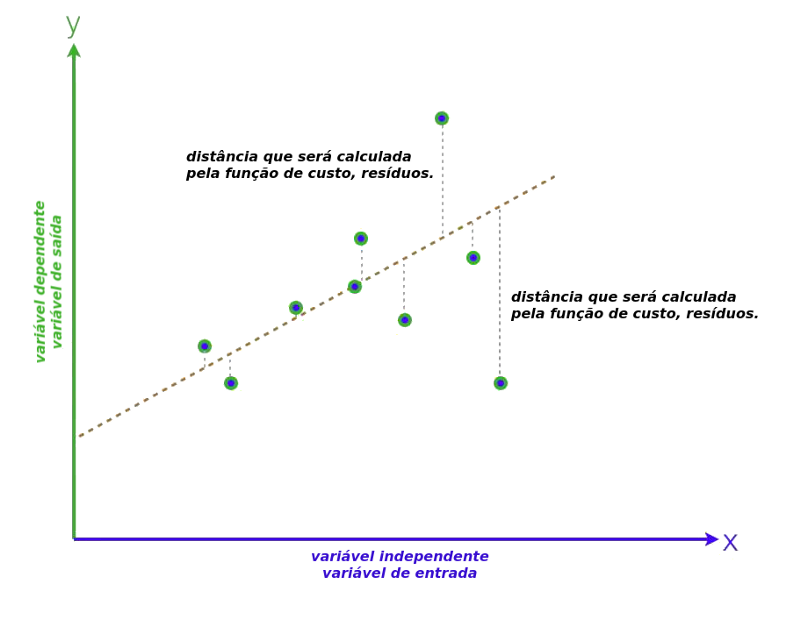

In [229]:
lr = LinearRegression()

Antes de aplicar o modelo, é necessário separar dataset em train(treinamento) e test(teste). Assim, o modelo é treinado por uma parte do dataset e depois é testado na outra parte. De tal forma, pode-se testar a eficácia do modelo com dados que ele não conhece, que é o objetivo de se fazer esse tipo de análise.

Colocando todas as variáveis numéricas no modelo, tem-se um R2 razoável, de número 0.66.
O R2, ou R-squared, mede o quanto a variação da variável dependente, Y, nesse caso, o valor do imóvel, é explicada pelas variáveis independentes. Ou seja, para esse modelo, 66% da variação é explicada pelas variáveis contidas em X.

In [230]:
X = df_vendas_ibge[['Metragem', 'Quartos', 'Banheiros', 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro"]]

Y = df_vendas_ibge["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)


print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [8.54582462e-01 0.00000000e+00 1.50452830e-01 1.16213649e-05
 4.00435683e-02 5.84384389e-03 0.00000000e+00 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
          Min           1Q      Median          3Q          Max
-7.741417e+06 -567890.7906 240535.4644 844068.2128 4361402.6274


Coefficients:
                                    Estimate    Std. Error  t value   p value
_intercept                    -389021.510238  2.121735e+06  -0.1834  0.854582
Metragem                         6305.544145  3.718176e+02  16.9587  0.000000
Quartos                        110119.033993  7.648731e+04   1.4397  0.150453
Banheiros                      186251.929490  4.213507e+04   4.4204  0.000012
Vagas                           64648.076000  3.141918e+04   2.0576  0.040044
Média Moradores do Bairro     -675206.896990  2.441146e+05  -2.7659  0.005844
Renda Média do Bairro            -708.062087  5.243282e+01 -13.5042  0.000000
Renda média +10Anos do Bairro    1641.591281  1.25155

Ao se falar de regressão linear, existem alguns testes que podemos fazer para verificar a relevância estatística das variáveis do modelo, como os testes t e o teste f. Os testes t verifica se cada variável independente, estatisticamente, tem relevância para explicar a variável dependente, já o teste f verifica se todo o modelo, ou seja, a junção de todas as variáveis independentes, é relevante para explicar a variável dependente.

O p-valor testa hipótese nula com base em cada variável, que seria da variável independente não ter relevancia estatistica nenhuma para a variável dependente. Assumindo uma significância de 95%, podemos rejeitar a hipótese nula se o p-valor for de 0,05, ou 5%. De todas as variáveis dependentes, a única que não rejeita a hipótese nula é a "Quartos".

A estatística F está com o valor de 172.56. Podemos, então, consultar em alguma tabela tradicional, como a do link http://www.socr.ucla.edu/Applets.dir/F_Table.html, sob um grau de significância de 95%. 
A estatística F tem dois graus de liberdade, DF1 e DF2, que são são os graus de liberdade do númerador e do demoninador do modelo. DF1 pode ser calculado com k-1, onde K é o número de variáveis independentes, e DF2 com N - K, onde N é o tamanho da amostra. Nesse modelo, DF1 é 6, e DF2 é é 1456 - 7, que dá 1449. Como nossa estatística F é maior que a crítica, de 2.0986, se rejeita a hipótese nula de nenhuma das variáveis ser relevante estatisticamente para explicar a variável independente. 

# Machine Learning com a adição do metro quadrado

Como estamos falando de uma cidade, acaba que a localização, ou em qual bairro o imóvel se encontra, torna-se um fator relevante para ditar o valor do imóvel. Uma forma de colocar essa informação seria adicionando uma coluna referente à média de preço por M2 por bairro. Reaproveitei a variável da análise feita anteriormente dos dados agrupados e fiz outro merge com o dataframe.

In [231]:
df_vendas_ibge.drop(["Rua","Cidade","Tipo de Anúncio"], axis =1, inplace=True)

In [232]:
df_vendas_group.drop(["Metragem","Quartos","Banheiros","Vagas","Valor"], axis = 1)

Bairro  Preço por M2
0            Aclimação   7162.688384
1    Alto da Boa Vista   5708.743659
2         Alto da Lapa   6961.299081
3        Alto da Mooca   4385.002777
4    Alto de Pinheiros  10770.210195
..                 ...           ...
688    Vila Água Funda   4283.837057
689        Água Branca   7065.770523
690          Água Fria   5604.534005
691         Água Funda   3920.863309
692          Água Rasa   3846.911370

[693 rows x 2 columns]

In [235]:
df_vendas_ibge = df_vendas_ibge.merge(df_vendas_group.drop(["Metragem","Quartos","Banheiros","Vagas","Valor"], axis = 1), on='Bairro')

In [240]:
X = df_vendas_ibge[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2"]]
Y = df_vendas_ibge["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)


from regressors import stats
print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [1.23690476e-02 0.00000000e+00 2.01399926e-02 9.19492307e-01
 5.26938844e-04 4.54947438e-03 7.59649435e-05 1.28345694e-01
 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
          Min           1Q     Median          3Q         Max
-6.286084e+06 -434177.3298 12171.9008 537206.6888 2693085.498


Coefficients:
                                   Estimate    Std. Error  t value   p value
_intercept                    -4.586049e+06  1.826933e+06  -2.5102  0.012369
Metragem                       6.305985e+03  3.027087e+02  20.8319  0.000000
Banheiros                      8.937497e+04  3.834285e+04   2.3309  0.020140
Quartos                        6.916395e+03  6.839611e+04   0.1011  0.919492
Vagas                          7.917236e+04  2.269445e+04   3.4886  0.000527
Média Moradores do Bairro      5.973748e+05  2.096212e+05   2.8498  0.004549
Renda Média do Bairro         -2.676335e+02  6.709484e+01  -3.9889  0.000076
Renda média +10Anos do Bairro  3.617898e+02  2.37

O modelo continua globalmente significante, no entanto, a variável "Renda média +10Anos do Bairro", junto com a "Quartos", também tem uma estatística T insignificante. Pode-se dizer que isso se deve à sua correlação alta com a variável "Renda Média do Bairro", o que se chama de multicolinearidade, quando duas variáveis tem algum grau alto de correlação linear. Se quisermos saber o que cada variável tem de relevância para o modelo, isso se torna um problema. No entanto, como o objetivo, aqui, é predição, deixar ambas as variáveis no modelo não chega a ser um problema relevante.
Com a adição da variável "Preço por M2", o R2, que antes era 66%, aumentou para 77%.

# Aplicando a regressão no dataframe original de vendas.

Uma outra análise estatística pode ser realizada no df_vendas, o dataframe sem a adição dos dados do IBGE. Temos um R2 consideravelmente menor, de 52%. E, novamente, a um nível de significância de 95%, a variável 'quartos' continua sendo insignificante individualmente para o modelo. E a estatística F continua globalmente significante.



In [175]:
X = df_vendas[['Metragem','Quartos',"Banheiros","Vagas"]]

Y = df_vendas["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)


coef_pval:
 [2.41948883e-05 0.00000000e+00 3.48144042e-01 0.00000000e+00
 2.06119033e-01]

=========== SUMMARY ===========
Residuals:
          Min           1Q      Median          3Q          Max
-1.028436e+07 -397662.2496 215672.1593 782806.3692 1.580605e+07


Coefficients:
                 Estimate     Std. Error  t value   p value
_intercept -553879.419461  130949.395181  -4.2297  0.000024
Metragem      6831.461783      86.815329  78.6896  0.000000
Quartos      32653.385747   34798.267531   0.9384  0.348144
Banheiros   188540.347610   22623.152901   8.3340  0.000000
Vagas        22668.655129   17925.263297   1.2646  0.206119
---
R-squared:  0.52155,    Adjusted R-squared:  0.52083
F-statistic: 718.37 on 4 features


Adicionando a variável "Preço por M2", o R2 aumenta consideravelmente, para 73%. E a estatística t da variável "Quartos" passa a ser significante. O modelo continua globalmente significante, com a estatística f sendo maior que a f crítica.

In [176]:
df_vendas2 = df_vendas.merge(df_vendas_group.drop(["Metragem","Quartos","Banheiros","Vagas","Valor"], axis = 1), on='Bairro')

In [177]:
X = df_vendas2[['Metragem','Quartos',"Banheiros","Vagas","Preço por M2"]]

Y = df_vendas2["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)


coef_pval:
 [0.00000000e+00 0.00000000e+00 4.32395631e-01 2.83963966e-07
 3.28285890e-04 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
          Min           1Q    Median          3Q          Max
-7.190405e+06 -422520.6296 31832.748 568616.4768 1.188769e+07


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -2.239151e+06  114797.445157 -19.5052  0.000000
Metragem      5.925165e+03     119.602479  49.5405  0.000000
Quartos      -2.478212e+04   31560.091299  -0.7852  0.432396
Banheiros     1.010189e+05   19619.103820   5.1490  0.000000
Vagas         5.588567e+04   15535.464579   3.5973  0.000328
Preço por M2  3.224438e+02       3.626825  88.9052  0.000000
---
R-squared:  0.73210,    Adjusted R-squared:  0.73152
F-statistic: 1261.45 on 5 features


# Machine Learning com normalização

Vou verificar os dois modelos de maiores R2 que realizei e aplicar um método de normalização dos dados, para ver se a performance aumenta, visto que a variável dependente tem uma escala muito distinta das outras variáveis.
Assim, os dados são transformados em uma escala de 0 a 1, onde se mantém a informação.

In [178]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df_vendas_ibge[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2","Valor"]].columns
d = scaler.fit_transform(df_vendas_ibge[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2","Valor"]])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

Metragem  Banheiros  Quartos  Vagas  Média Moradores do Bairro  \
0  0.029605      0.125      0.4   0.04                   0.498951   
1  0.062500      0.125      0.4   0.04                   0.498951   
2  0.020207      0.125      0.2   0.12                   0.498951   
3  0.032425      0.250      0.4   0.04                   0.498951   
4  0.062500      0.000      0.4   0.04                   0.498951   

   Renda Média do Bairro  Renda média +10Anos do Bairro  Preço por M2  \
0               0.251641                       0.331973      0.261206   
1               0.251641                       0.331973      0.261206   
2               0.251641                       0.331973      0.261206   
3               0.251641                       0.331973      0.261206   
4               0.251641                       0.331973      0.261206   

      Valor  
0  0.021195  
1  0.048845  
2  0.044006  
3  0.014974  
4  0.052993

In [179]:
X = scaled_df[['Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2"]]

Y = scaled_df["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

from regressors import stats
print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)

coef_pval:
 [8.01376787e-09 0.00000000e+00 4.58871090e-02 9.35012722e-01
 3.73529712e-02 2.73262578e-01 1.76941168e-01 4.80927347e-01
 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median     3Q    Max
-0.4182 -0.0315  0.0025 0.0397 0.6664


Coefficients:
                               Estimate  Std. Error  t value   p value
_intercept                    -0.149541    0.025497  -5.8651  0.000000
Metragem                       1.009412    0.055090  18.3231  0.000000
Banheiros                      0.051257    0.025612   2.0013  0.045887
Quartos                       -0.002071    0.025385  -0.0816  0.935013
Vagas                          0.130507    0.062525   2.0873  0.037353
Média Moradores do Bairro      0.037883    0.034541   1.0967  0.273263
Renda Média do Bairro         -0.172097    0.127283  -1.3521  0.176941
Renda média +10Anos do Bairro  0.096007    0.136118   0.7053  0.480927
Preço por M2                   0.335314    0.028041  11.9580  0.000000
---

In [180]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df_vendas2[['Metragem','Quartos',"Banheiros","Vagas",'Preço por M2',"Valor"]].columns
d = scaler.fit_transform(df_vendas2[['Metragem','Quartos',"Banheiros","Vagas",'Preço por M2',"Valor"]])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

Metragem  Quartos  Banheiros  Vagas  Preço por M2     Valor
0  0.348592      0.6      0.875   0.20      0.073645  0.475727
1  0.084507      0.4      0.375   0.12      0.073645  0.148226
2  0.061268      0.6      0.250   0.12      0.073645  0.093756
3  0.038380      0.2      0.125   0.04      0.073645  0.044733
4  0.066901      0.6      0.625   0.08      0.073645  0.136243

In [181]:
X = scaled_df[['Metragem','Quartos',"Banheiros","Vagas","Preço por M2"]]

Y = scaled_df["Valor"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)
lr.fit(X_train, Y_train)


print("coef_pval:\n", stats.coef_pval(lr, X_test, Y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = X_train.columns
stats.summary(lr, X_test, Y_test, xlabels)


coef_pval:
 [0.00000000e+00 0.00000000e+00 4.71357224e-01 4.98289188e-09
 1.43723478e-05 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median     3Q    Max
-0.5226 -0.0273  0.0028 0.0378 0.4042


Coefficients:
              Estimate  Std. Error  t value   p value
_intercept   -0.126635    0.003680 -34.4161  0.000000
Metragem      1.097318    0.032189  34.0896  0.000000
Quartos      -0.008189    0.011368  -0.7204  0.471357
Banheiros     0.056750    0.009668   5.8701  0.000000
Vagas         0.107373    0.024698   4.3474  0.000014
Preço por M2  1.757244    0.043038  40.8297  0.000000
---
R-squared:  0.76276,    Adjusted R-squared:  0.76225
F-statistic: 1484.13 on 5 features


O R2 após as normalizações não teve grandes diferenças ao que estava antes. O modelo com os dados do IBGE diminuiu de 76% para 73%, e a do modelo de vendas sem o IBGE aumenta de 73% para 76%.

# 4) Conclusão

Após a análise exploratória e o uso dos modelos de machine learning, cheguei à conclusão que dois modelos foram os mais eficazes em predizer o valor do imóvel. Primeiro, o modelo com as variáveis 'Metragem','Banheiros',"Quartos", 'Vagas',"Média Moradores do Bairro","Renda Média do Bairro","Renda média +10Anos do Bairro","Preço por M2", que produziu um R2 de 77%. E, segundo, o modelo com os dados normalizado e com as variáveis 'Metragem','Quartos',"Banheiros","Vagas","Preço por M2", que produziu um R2 de 76%. E ambos fazem sentido com as análises gráficas realizadas, que mostravam, aparentemente, relações lineares entre a variável dependente, o valor do imóvel, e as outras variáveis.

# 5) Referências


Calculando e interpretando a estatística F: https://campus.datacamp.com/courses/inferential-statistics/lab-5-quantitative-associations-anova?ex=5#:~:text=The%20F%20distribution%20has%20two,is%20the%20number%20of%20groups.

Estatística T: https://www.investopedia.com/terms/t/t-test.asp#:~:text=Higher%20values%20of%20the%20t,that%20the%20groups%20are%20similar.

Bibliotecas utilizadas: 
Pandas (https://pandas.pydata.org/)
Matplotlib (https://matplotlib.org/)
Seaborn (https://seaborn.pydata.org/)
Skicit-Learn(https://scikit-learn.org/stable/)
Galeritas(https://galeritas.readthedocs.io/en/latest/)


# 6) Agradecimentos

Queria agradecer a toda à staff da Alura por realizar essa imersão, e, principalmente, aos três instrutores, Thiago Gonçalves, Vivian Yamassaki e Paulo Silveira. Foram dias de bastante aprendizado e muitas horas gastas realizando o projeto. 
Termino essa semana com sensação de trabalho feito e de conhecimento adquirido.

# 7) Sobre mim


Agradeço bastante se leu até aqui, me chamo João Victor e estou me graduando em ciências econômicas. Tenho bastante interesse pelo campo de ciência de dados e por econometria, e tenho estudado com bastante afinco os temas há um tempo.

Deixo aqui meu linkedin para contato ou sugestões:
https://www.linkedin.com/in/joãorangel/